In [ ]:
data <- read.csv(file.path("..","data","training_data.csv"))
data <- na.omit(data)
dim(data)
head(data)

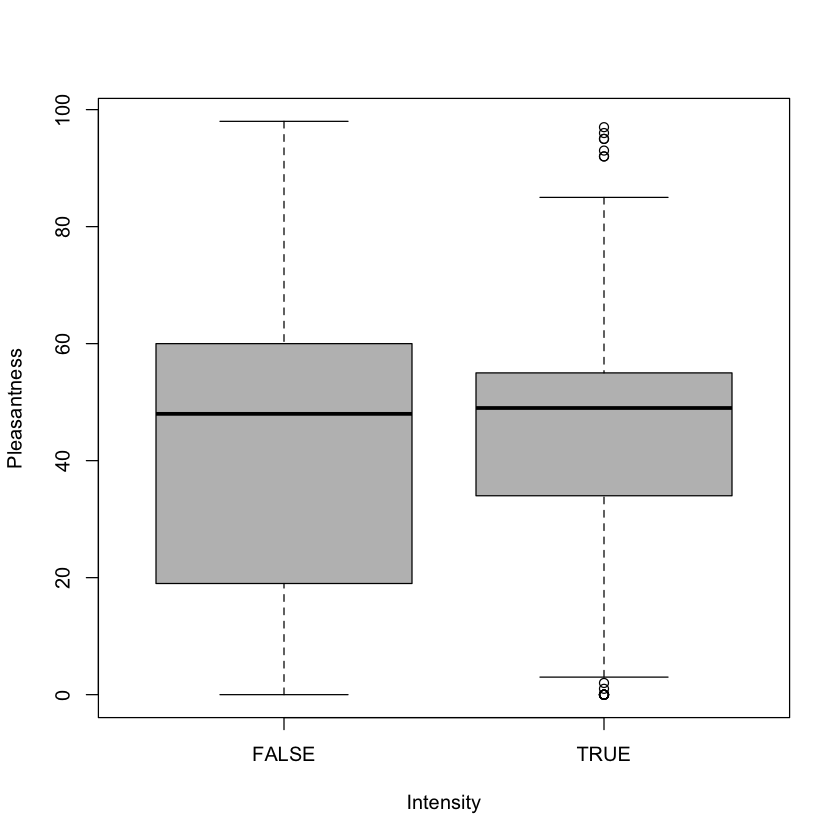

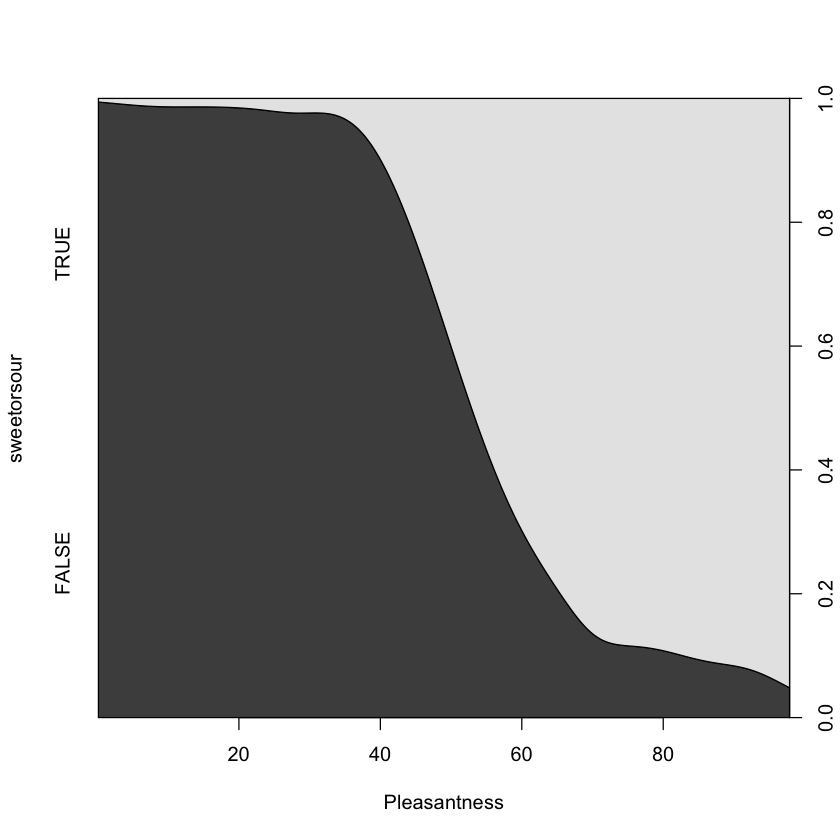

In [114]:
#plot pleasantness en fonction some features (intensity)

plot(data$Intensity, data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("FALSE","TRUE"))


sweetorsour<- factor(data$SWEETORSOUR)
cdplot( sweetorsour ~ data$VALENCE.PLEASANTNESS, xlab= 'Pleasantness')


interpretation : 

--> on peut voir que sweet or sour devient true quand pleasantness augmente . 

In [134]:
# change the low or high Intensity to binary values 

lookup <- c("low" = 1, "high" = 0)
data$Intensity <- lookup[data$Intensity]



Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
0,45,0,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
1,49,1,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
1,56,1,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
1,7,0,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
0,51,0,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
1,21,0,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0


In [136]:

#tire des datas : bougeons les collones avec var = 0 and colonnea correlée  .
data <- data[, which(apply(data, 2, var)!=0)] 
cormat<- cor(data)



c<- colnames(cormat)[!apply((lower.tri(cormat) & abs(cormat)==1),2,any)] #lower.tri bc cormat matrice symetrique.

data<-data[, c]
data<-na.omit(data)
data <- data[,-3]

dim(data)
head(data)



[1]  708 2879

Intensity,VALENCE.PLEASANTNESS,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
0,45,208.33,5.952,19.698,34.491,21.523,39.571,0.563,0.985,...,0,0,1,0,1,0,1,0,1,0
1,49,122.18,6.431,11.349,18.745,12.261,21.285,0.597,0.987,...,0,0,0,0,0,0,0,0,0,0
1,56,242.29,7.572,20.832,32.167,21.693,35.535,0.651,1.005,...,1,0,1,0,1,1,1,0,1,1
1,7,88.12,6.294,7.537,14.189,7.955,16.080,0.538,1.014,...,0,0,0,0,0,0,0,0,0,0
0,51,136.21,6.191,12.876,21.629,14.023,24.701,0.585,0.983,...,0,0,0,0,0,0,0,0,0,0
1,21,192.28,6.409,17.644,29.723,19.000,33.740,0.588,0.991,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
#Feature Engineering : foward regression create new data
library(leaps)


regfit.fwd <- regsubsets(data$VALENCE.PLEASANTNESS ~ . , data, nvmax = 2879, method = "seqrep")


# plot
plot(regfit.fwd.summary$adjr2, type = "l", #xlim = c(1,240),
     ,xlab = "Number of Variables", ylab = "adjusted R^2")
#adjr2.max <- which.max(regfit.fwd.summary$adjr2)
#points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

#data_ <- data[, which(regfit.fwd.summary$which[adjr2.max, ]==0)] 
#dim(data_)

In [38]:
#PCA with new_data

data.sc <- scale(data_[, -1]) #remove  prediction data()
pca <- prcomp(data.sc, data= F)
plot(pca$x[,1:2])

ERROR: Error in scale(data_[, -1]): objet 'data_' introuvable


In [9]:
biplot(pca, col = c('gray', 'red'), scale = 0)

ERROR: Error in biplot(pca, col = c("gray", "red"), scale = 0): objet 'pca' introuvable


In [14]:
s <- svd(data.sc)
sum((s$v - pca$rotation)^2)
sum((s$u %*% diag(s$d) - pca$x)^2)

ERROR: Error in as.matrix(x): objet 'data.sc' introuvable


In [15]:
pca.var <- pca$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

ERROR: Error in eval(expr, envir, enclos): objet 'pca' introuvable


--> on voit clairement que PC ne sont pas suffisante pour representer les données . 

In [124]:
#divide into training and test set 
set.seed(1)
idx.train <- sample(nrow(data), nrow(data)*1/2)
data.train <- data[idx.train,] 
data.test <- data[-idx.train,]
head(data.train)
head(data.test)

,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
679,0,49,89.0,170.33,5.010,17.510,33.047,19.830,38.777,0.515,...,0,0,0,0,0,0,0,0,0,0
129,0,53,35.4,116.23,4.843,11.929,23.396,13.546,27.531,0.497,...,0,0,0,0,0,0,0,0,0,0
509,0,44,121.0,148.22,6.444,13.876,22.629,15.023,25.701,0.603,...,0,0,0,0,0,0,0,0,1,0
471,0,43,101.0,120.16,7.068,10.822,16.862,11.500,18.870,0.637,...,0,0,0,0,0,0,0,0,0,0
299,1,47,133.0,135.18,7.115,11.843,18.964,12.506,21.369,0.623,...,0,0,0,0,0,0,0,0,0,0
270,1,62,103.0,138.18,6.909,12.064,20.073,12.716,22.495,0.603,...,0,0,0,0,0,0,0,0,0,0


,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
4,1,7,56.6,88.12,6.294,7.537,14.189,7.955,16.080,0.538,...,0,0,0,0,0,0,0,0,0,0
5,0,51,84.7,136.21,6.191,12.876,21.629,14.023,24.701,0.585,...,0,0,0,0,0,0,0,0,0,0
6,1,21,160.0,192.28,6.409,17.644,29.723,19.000,33.740,0.588,...,0,0,0,0,1,0,1,0,1,0
7,0,56,116.0,170.22,7.401,15.349,22.745,16.261,25.285,0.667,...,0,0,0,0,1,0,0,0,1,0
8,0,52,25.0,114.26,4.395,12.741,24.952,14.853,29.737,0.490,...,0,0,0,0,0,0,0,0,0,0
9,0,53,355.0,268.30,7.666,21.304,36.025,21.614,39.950,0.609,...,1,0,1,0,1,1,1,1,1,1


In [118]:
#perform linear multiple regression on the trainig set 
lm.fit <- lm(data.train$VALENCE.PLEASANTNESS ~ ., data = data.train) 
summary(lm.fit)




Call:
lm(formula = data.train$VALENCE.PLEASANTNESS ~ ., data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.523  -1.435   0.000   1.497  29.523 

Coefficients: (4620 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -9.753e+13  2.181e+14  -0.447    0.656    
Intensity               2.964e+00  2.292e+00   1.293    0.199    
SWEETORSOUR             2.604e+01  3.557e+00   7.322 5.81e-11 ***
complexity.from.pubmed -9.319e+08  2.084e+09  -0.447    0.656    
MW                     -5.144e+11  1.150e+12  -0.447    0.656    
AMW                     5.718e+10  1.278e+11   0.447    0.656    
Sv                      1.386e+13  3.100e+13   0.447    0.656    
Se                      9.079e+12  2.030e+13   0.447    0.656    
Sp                      9.492e+11  2.122e+12   0.447    0.656    
Si                     -8.270e+12  1.849e+13  -0.447    0.656    
Mv                      3.413e+12  7.631e+12 

In [116]:
# compare with the test set 
lm.fit <- lm(data.test$VALENCE.PLEASANTNESS ~ ., data = data.test) 
summary(lm.fit)


Call:
lm(formula = data.test$VALENCE.PLEASANTNESS ~ ., data = data.test)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.500  -1.500   0.000   1.375  46.000 

Coefficients: (2628 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)            -2.876e+06  5.126e+06  -0.561    0.576
complexity.from.pubmed  2.034e+01  4.897e+01   0.415    0.679
MW                     -6.074e+03  1.098e+04  -0.553    0.581
AMW                     3.546e+04  5.858e+04   0.605    0.546
Sv                      1.709e+06  2.878e+06   0.594    0.554
Se                      1.140e+06  1.996e+06   0.571    0.569
Sp                     -6.129e+05  8.641e+05  -0.709    0.480
Si                     -1.022e+06  1.777e+06  -0.575    0.567
Mv                      6.589e+02  8.459e+04   0.008    0.994
Me                     -2.494e+05  5.060e+05  -0.493    0.623
Mp                     -8.449e+05  1.432e+06  -0.590    0.557
Mi                      2.344

**INTERPRETATION :**

multiple R-squared for training set : 0.5673

multiple R-squared for test set : 0.7364

So this model is too flexible ? 



Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



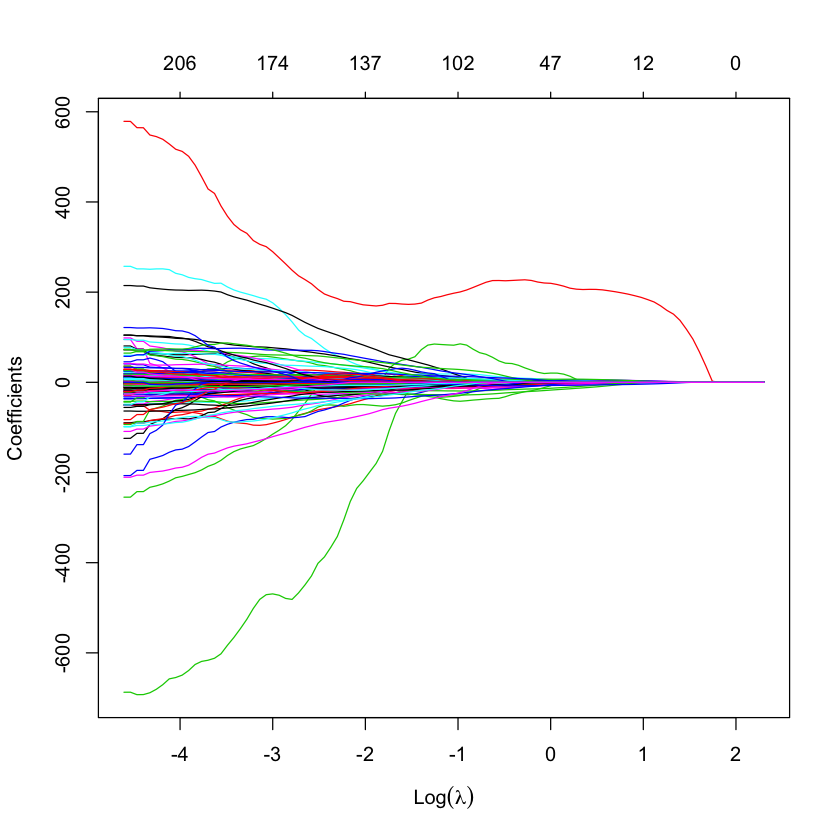

In [12]:
#LASSO L1-REGULARIZATION 

v<-c(colnames(data.train[2:240]))
library(glmnet)
x <- as.matrix(data.train[,v])
y <- data.train$VALENCE.PLEASANTNESS
lasso.mod <- glmnet(x, y, alpha = 1, lambda = 10^seq(1, -2, length = 100))
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

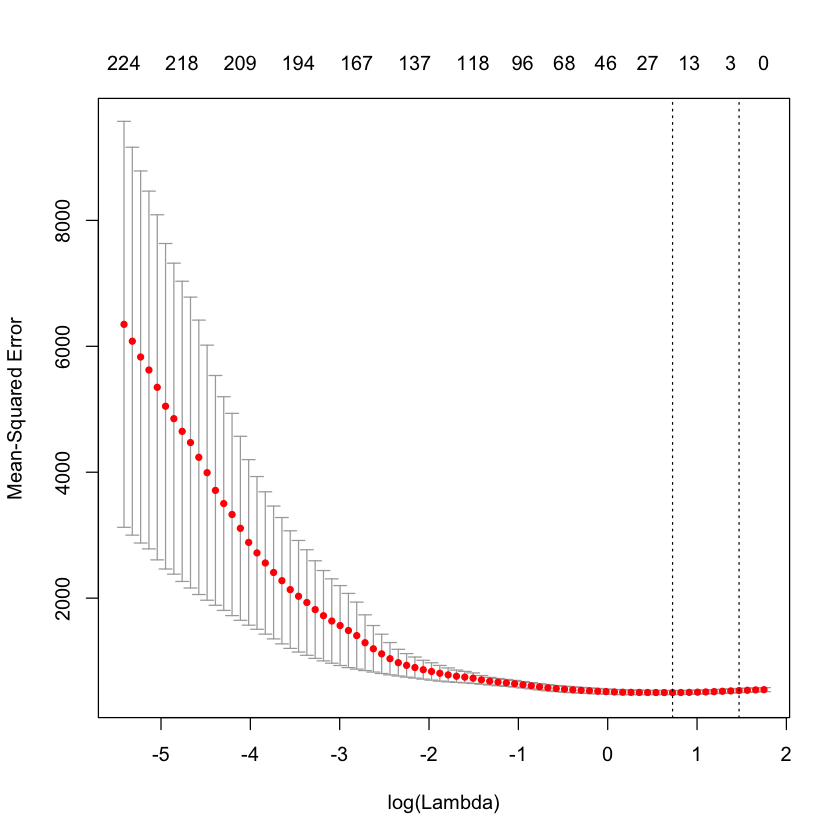

In [13]:
cv.lasso <- cv.glmnet(x, y, alpha = 1, nfold = 10)
plot(cv.lasso)

In [14]:
best.lasso <- glmnet(x, y, alpha = 1, lambda = cv.lasso$lambda.min)
coef(best.lasso)

240 x 1 sparse Matrix of class "dgCMatrix"
                        s0
(Intercept)    41.08811181
D.Dtr04         .         
D.Dtr09         .         
D.Dtr10         .         
PJI2            .         
Psi_e_1d        .         
X3A             .         
X4A             .         
X5A             .         
X5Av            .         
CIC5           -1.67457000
J_Dz.p.         .         
J_Dz.i.         .         
MATS1i          .         
MATS8i          .         
GATS1i          .         
GATS2i          .         
GATS3i          .         
GATS1s          .         
GATS3s          .         
GATS4s          .         
GATS5s          .         
GATS6s          .         
JGI3            .         
JGI4            .         
JGI5            .         
JGI6          199.97423303
JGI7            .         
P_VSA_LogP_2    .         
P_VSA_LogP_3    .         
P_VSA_MR_2      0.02549101
P_VSA_MR_7      .         
SpMAD_AEA.dm.   .         
Eig02_EA.dm.    .         
Eig03_EA.dm.

The coefficient found are much smaller than the ones with multilinear regression 